In [1296]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import joblib

data = pd.read_csv('heart.csv')

In [1297]:
# Converting using mappings
sex_mapping = {
    'M': 0,
    'F': 1
}
data['Sex'] = data['Sex'].map(sex_mapping)

angina_mapping = {
    'N': 0,
    'Y': 1
}
data['ExerciseAngina'] = data['ExerciseAngina'].map(angina_mapping)

In [1298]:
# Converting using LabelEncoder
le = LabelEncoder()
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

In [1299]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

In [1300]:
# Split data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

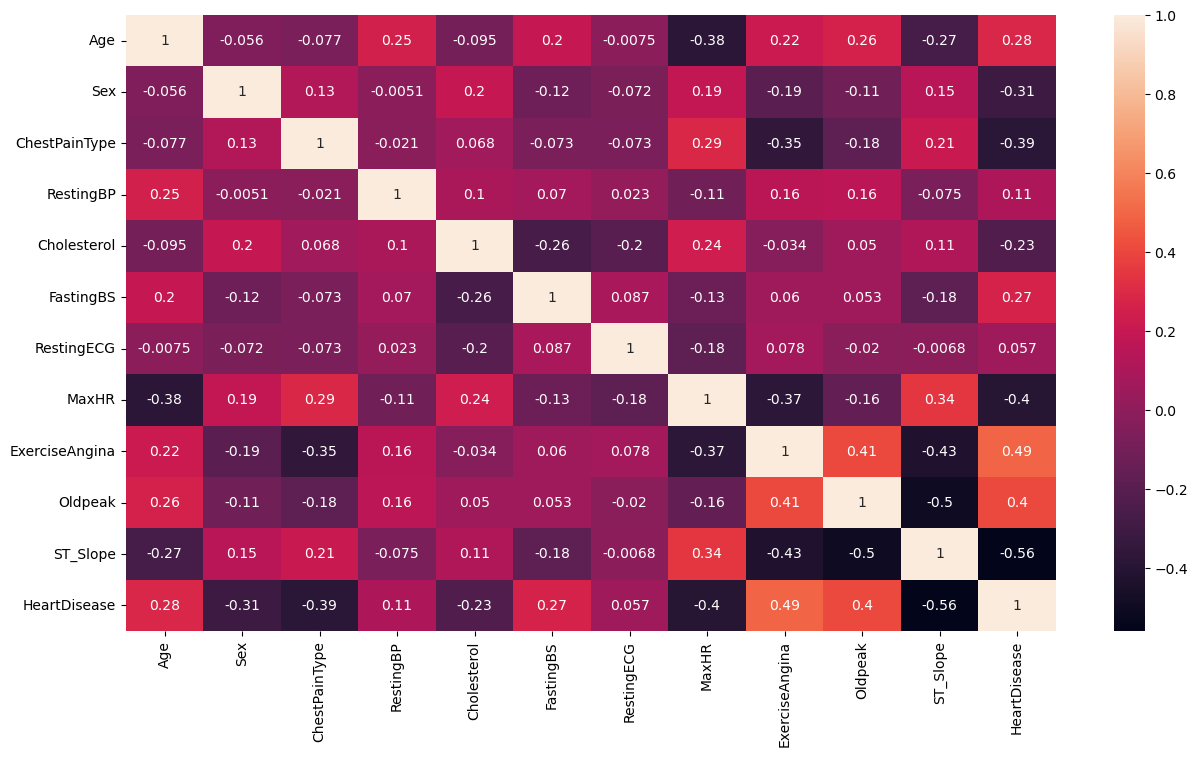

In [1301]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [1302]:
# Scale training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Save testing data
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

X_test_df.to_csv('x_testing_data.csv', index=False)
y_test_df.to_csv('y_testing_data.csv', index=False)

In [1304]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [1305]:
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [1, 5, 10]
        }
    },
    'svc': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf'],
            'C': [0.001, 0.01, 0.1, 1, 10],
            'gamma': [0.001, 0.01, 0.1, 1]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 10, 15, 20, 25, 30]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'n_estimators': [100, 150, 200],
            'max_depth': [None, 1, 3, 5, 10],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [5, 10]
        }
    }
}

In [1306]:
scores = []

for model_name, model_dict in model_params.items():
    clf = GridSearchCV(model_dict['model'], model_dict['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

print('DONE')

DONE


In [1307]:
for score in scores:
    print(score, '\n')

{'model': 'logistic_regression', 'best_score': 0.8457727713178294, 'best_params': {'C': 1}} 

{'model': 'svc', 'best_score': 0.8613614341085271, 'best_params': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}} 

{'model': 'knn', 'best_score': 0.8488856589147286, 'best_params': {'n_neighbors': 20}} 

{'model': 'random_forest', 'best_score': 0.8753512596899224, 'best_params': {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 150}} 



In [1308]:
clf = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, 
                             min_samples_split=5, n_estimators=150)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=150)

In [1321]:
scores = cross_val_score(clf, X_test, y_test, cv=5)
score_avg = np.mean(scores)
print(score_avg)

0.8696103896103896


In [1311]:
joblib.dump(clf, 'forest_model.joblib')

['forest_model.joblib']